# Проект: Принятие решений в бизнесе.

## Описание проекта:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

**Цель проекта:**

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных:**

**Данные для первой части**

 - Hypothesis — краткое описание гипотезы;
    
 - Reach — охват пользователей по 10-балльной шкале;

 - Impact — влияние на пользователей по 10-балльной шкале;
    
 - Confidence — уверенность в гипотезе по 10-балльной шкале;

 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
 
**Данные для второй части**

 - transactionId — идентификатор заказа;
 
 - visitorId — идентификатор пользователя, совершившего заказ;
 
 - date — дата, когда был совершён заказ;
 
 - revenue — выручка заказа;
 
 - group — группа A/B-теста, в которую попал заказ.
 
 - date — дата;
 
 - group — группа A/B-теста;
 
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

**Ход исследования:**

1. Обзор данных:

 - импорт библиотек;
 

 - чтение файла и сохранение в датафрейм;
 

 - просмотр строк таблицы;
 

 - просмотр информации по таблице.
 

2. Предоработка данных:


 - заменить названия столбцов;
 

 - привести данные к нужным типам;
 

 - обработать пропуски;
 
 
3.  Приоритизация гипотез:


 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
 

 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
 
 
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло;
 
 
4. Анализ A/B-теста:


 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения;
 
 
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения;
 
 
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения;
 
 
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения; 
 
 
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения;
 
 
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения;
 
 
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей; 
 
 
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения;
 
 
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов;
 
 
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения; 
 
 
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения;
 
 
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения;
 

 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения;
 
 
 - Примите решение по результатам теста и объясните его. Варианты решений:
 
 
      - Остановить тест, зафиксировать победу одной из групп.
         
      - Остановить тест, зафиксировать отсутствие различий между группами.
      
      - Продолжить тест.
      


## Обзор данных.

Импортируем нужные библиотеки.

In [1]:
# импорт библиотек

import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings


Сохраним данные в датафреймы. 

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv') #указывается локальный путь
    )
         
except:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv') #указывается путь на файл в общем доступе
    )
    

Посмотрим таблицу hypothesis.

In [3]:
# обзор датафрейма hypothesis
hypothesis 

Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5

Выведем информацию по таблице hypothesis.

In [4]:
# просмотр информации hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Проверим датафрейм hypothesis на дубликаты.

In [5]:
# поиск дубликатов
hypothesis.duplicated().sum()

0

Посчитаем пропуски в датафрейме hypothesis.

In [6]:
# поиск пропущенных значений
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Посмотрим таблицу orders.

In [7]:
# обзор датафрейма orders
orders.head(10)

transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B

Выведем информацию по таблице orders.

In [8]:
# просмотр информации orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим датафрейм orders на дубликаты.

In [9]:
# поиск дубликатов
orders.duplicated().sum()

0

Посчитаем пропуски в датафрейме orders.

In [10]:
# поиск пропущенных значений
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Посмотрим таблицу visitors

In [11]:
# обзор датафрейма visitors
visitors.head(10)

date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10     A       406

Выведем информацию по таблице visitors.

In [12]:
# просмотр информации visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Проверим датафрейм visitors на дубликаты.

In [13]:
# поиск дубликатов
visitors.duplicated().sum()

0

Посчитаем пропуски в датафрейме visitors. 

In [14]:
# поиск пропущенных значений
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64


В датафрейме hypothesis 5 столбцов и 9 строк. Тип данных указан верно. Дубликатов нет, пропусков не обнаружено. Также, следует изменить названия столбцов - поменять на нижний регистр. 

В датафрейме orders 5 столбцов и 1197 строк. Названия стобцов непонятно написаны, например столбец transactionId и visitorId. Тип данных в столбце date - object, следует сменить на datetime, так как указаны даты. Дубликатов нет. Пропусков не обнаружено. 

В датафрейме visitors всего 3 столбца и 62 строки. Тип данных в столбце date - object, следует изменить на datetime, так как указана дата. Дубликатов нет, пропусков не обнаружено. 

## Предоработка данных.

Исправим названия столбцов в датафрейме hypothesis.

In [15]:
# приводим к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Исправим названия столбцов в датафрейме orders.

In [16]:
orders.columns = orders.columns.str.replace('Id', '_id')
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Приведем данные в столбцах date датафреймов orders и visitors.

In [17]:
# преобразование данных о времени 

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [18]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Приоритизация гипотез.

### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [19]:
hypothesis

hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5

In [20]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).round(2).head()

hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00

Наиболее перспективные гипотезы по ICE - 8, 0, 7, 6, 2. 

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [21]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False).head()

hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2

Наиболее перспективные гипотезы по RICE - 7, 2, 0, 6, 8.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Наиболее перспективные гипотезы по ICE - 8, 0, 7, 6, 2.

В топ 5 гипотез по RICE также вошли все эти гипотезы, только теперь на 1 месте - 7 гипотеза. Отсальные гипотезы тоже поменяли свою последовательность. 

Так произошло, потому что при подсчете RICE мы также используем параметр Reach - скольких пользователей затронет изменение, которое вы хотите внести. 

## Анализ A/B-теста.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

При анализе А/В тестов очень важно отвтетить на следующие вопросы:

 - сколько у нас групп в А/В тесте - важно понять, парный он или множественный;

 - даты начала и окончания теста - не помешает в целом понимание временных рамок теста, а также в случае, если у нас есть информация о том, как тест был запроектирован, важно сравнить даты его фактического проведения с запланированными;

 - сколько пользователей в каждой группе (по таблице с заказами) - поможет сделать вывод о сбалансированности групп по числу пользователей.

In [22]:
orders.groupby(['group']).sum()

transaction_id     visitor_id  revenue
group                                        
A       1191226823565  1211535685633  4084803
B       1389051974914  1381118605657  5907760

Как мы видим, у нас есть информация о двух группа - А и В, следовательно тест парный. 

Посмотрим на даты проведения теста. 

In [23]:
min_date = visitors['date'].min()
max_date = visitors['date'].max()
print('Дата начала теста:', min_date)
print('Дата конца теста:', max_date)

Дата начала теста: 2019-08-01 00:00:00
Дата конца теста: 2019-08-31 00:00:00


Время проведения теста начинается 1 августа 2019 года и продолжается ровно месяц - до 31 августа 19 года. 

"если у нас есть информация о том, как тест был запроектирован, важно сравнить даты его фактического проведения с запланированными" - даннных о запланированных датах проведения теста у нас нет, поэтому будем отталкиваться от этих дат.

Предварительно изучим количество заказов и посещений в каждой из групп.

In [24]:
print('Всего посетителей в датафрейме orders -', orders['visitor_id'].nunique())

Всего посетителей в датафрейме orders - 1031


In [25]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
Количество заказов в группе А - 557
Количество заказов в группе B - 640


Количество посещений в группе В - 18916, что на 180 посещений больше, чем в группе А. Проверим, нет ли в данных пользователей, участвовавших в нескольких группах теста одновременно.  

In [26]:
visitors_A = orders[orders['group']=='A']['visitor_id']
visitors_B = orders[orders['group']=='B']['visitor_id']

In [27]:
visitors_AB = orders.loc[orders['visitor_id'].isin(visitors_A)& orders['visitor_id'].isin(visitors_B),'visitor_id'].unique()

In [28]:
visitors_AB

array([4069496402,  963407295,  351125977, 3234906277,  199603092,
        237748145, 3803269165, 2038680547, 2378935119, 4256040402,
       2712142231,    8300375,  276558944,  457167155, 3062433592,
       1738359350, 2458001652, 2716752286, 3891541246, 1648269707,
       3656415546, 2686716486, 2954449915, 2927087541, 2579882178,
       3957174400, 2780786433, 3984495233,  818047933, 1668030113,
       3717692402, 2044997962, 1959144690, 1294878855, 1404934699,
       2587333274, 3202540741, 1333886533, 2600415354, 3951559397,
        393266494, 3972127743, 4120364173, 4266935830, 1230306981,
       1614305549,  477780734, 1602967004, 1801183820, 4186807279,
       3766097110, 3941795274,  471551937, 1316129916,  232979603,
       2654030115, 3963646447, 2949041841])

Удалим этих пользователей из заказов.

In [29]:
orders = orders.loc[~orders['visitor_id'].isin(visitors_AB)]

In [30]:
print('Всего посетителей в датафрейме orders -', orders['visitor_id'].nunique())

Всего посетителей в датафрейме orders - 973


In [31]:
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество заказов в группе А - 468
Количество заказов в группе B - 548


Подготовим таблицу с куммулятивными данными по выручке и посещениям.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [32]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

In [33]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head(10)

date group  transaction_id  visitor_id  revenue
55  2019-08-01     A              23          19   142779
66  2019-08-01     B              17          17    59758
175 2019-08-02     A              42          36   234381
173 2019-08-02     B              40          39   221801
291 2019-08-03     A              66          60   346854
383 2019-08-03     B              54          53   288850
499 2019-08-04     A              77          71   388030
498 2019-08-04     B              68          66   385740
719 2019-08-05     A              99          92   474413
699 2019-08-05     B              89          87   475648

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [34]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {'date': 'max', 'group': 'max', 'visitors': 'sum'}
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated.head(10)

date group  visitors
55  2019-08-01     A       719
66  2019-08-01     B       713
175 2019-08-02     A      1338
173 2019-08-02     B      1294
291 2019-08-03     A      1845
383 2019-08-03     B      1803
499 2019-08-04     A      2562
498 2019-08-04     B      2573
719 2019-08-05     A      3318
699 2019-08-05     B      3280

Объединим обе таблицы в одну с понятными названиями столбцов: 

In [35]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]


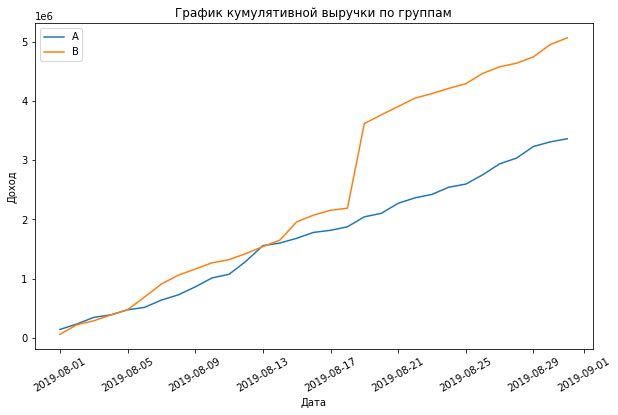

In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', )

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Доход')
plt.xticks(rotation=30)
plt.legend() 
plt.show()


Кумулятивная выручка группы В имеет резкий скачок между 18-19 августа, что говорит о всплесках заказов, либо в этот момент оформляли очень доростоящие товары. 
Кумулятивная выручка группы А растет линейно. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

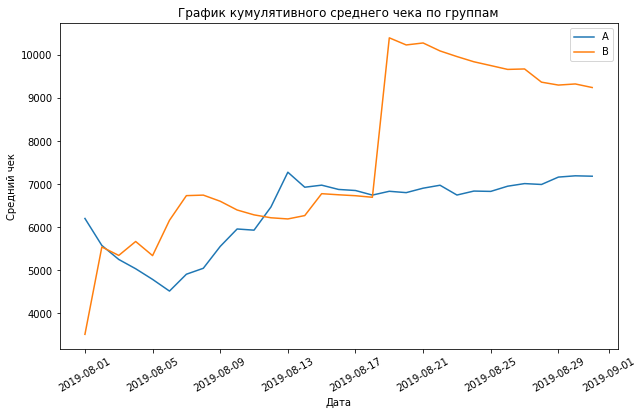

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=30)
plt.legend() 
plt.show()

Средний чек в группе А после 13 августа стабилизировался и далее находился более менее на одном уровне. Снова мы видим резкий скачок группы В. После 17-18 числа он начинает снижаться. 

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline():

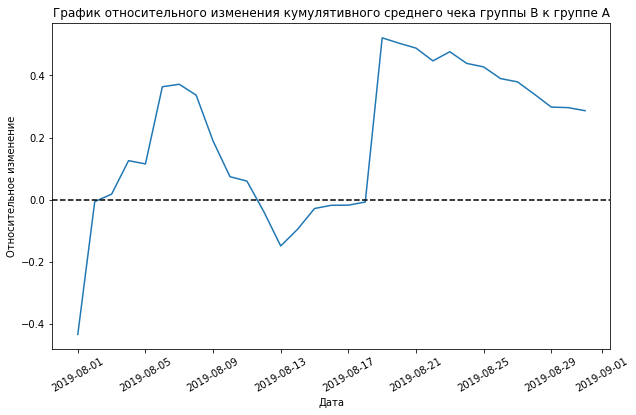

In [38]:
# собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=30)
plt.show()

График имеет несколько резких скачков. Все графики пока имеют одну тенденцию. Где-то точно есть крупные заказы и выбросы!

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам.

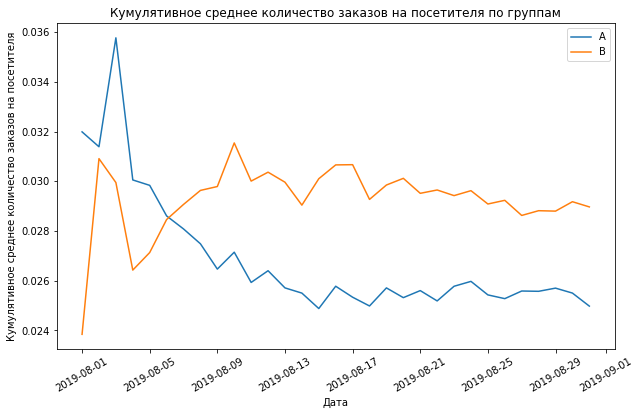

In [39]:
# считаем кумулятивное среднее количество заказов на посетителя

cumulativeData['mean'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['mean'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['mean'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.xticks(rotation=30)
plt.show()

Среднее количество заказов и у одной, и у другой группы растет. Среднее количество заказов на посетителя группы В выше, чем в группе А.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

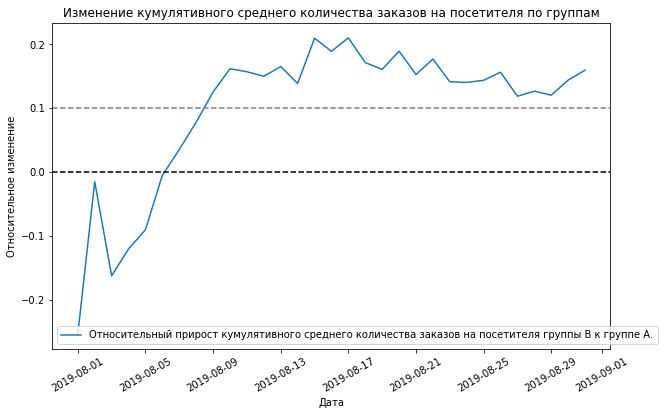

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','mean']].merge(cumulativeDataB[['date','mean']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['meanB']/mergedCumulativeConversions['meanA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B к группе A.")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Изменение кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=30)
plt.show()

Кумулятивное среднее количество заказов на посетителя группы В была относительно ниже, чем в группе А. Но затем быстро пошла вверх. Также не будем забывать про наличие крупных заказов в группе В или выбросах. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Узнаем количество заказов по пользователям. 

In [41]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.sort_values(by = 'orders', ascending = False).head()

visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3

In [42]:
ordersByUsers.describe()

visitor_id      orders
count  9.730000e+02  973.000000
mean   2.118387e+09    1.044193
std    1.221446e+09    0.238090
min    5.114589e+06    1.000000
25%    1.028756e+09    1.000000
50%    2.138109e+09    1.000000
75%    3.141508e+09    1.000000
max    4.283872e+09    3.000000

В большинстве случаев пользователи совершают один заказ. Максимальное количество заказов - 11. 

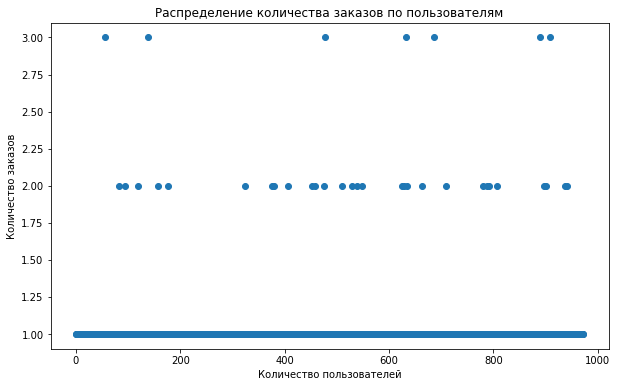

In [43]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers

x_values = pd.Series(range(0, len(ordersByUsers)))

# строим точечную диаграмму

plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Судя по графику большинство пользователей совершают не более 1-2 заказов. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Определим 95 и 99 перцентили количества заказов на пользователя:

In [44]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Более 1 заказа совершают только 5 % пользователей. 1 % пользователей совершают более 2 заказов. 

Выберем границу для определения аномальных пользователей - 2 заказа на одного пользователя. 

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [45]:
orders['revenue'].describe()

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

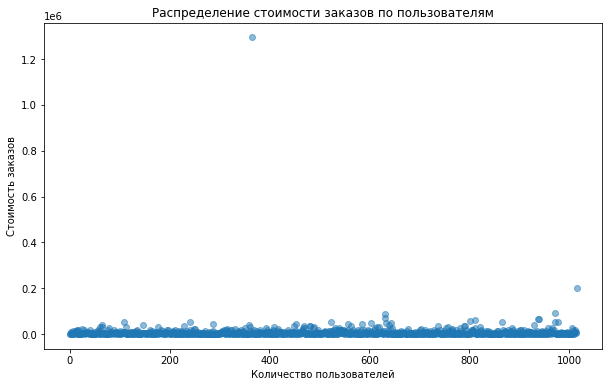

In [46]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'], alpha = 0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

На графике мы можем увидеть максимальную сумму заказа. Почти 1,3 млн. 

Построим похожий график, но без двух достаточно крупных покупок, чтобы исследовать распределение менее аномальных покупок. 

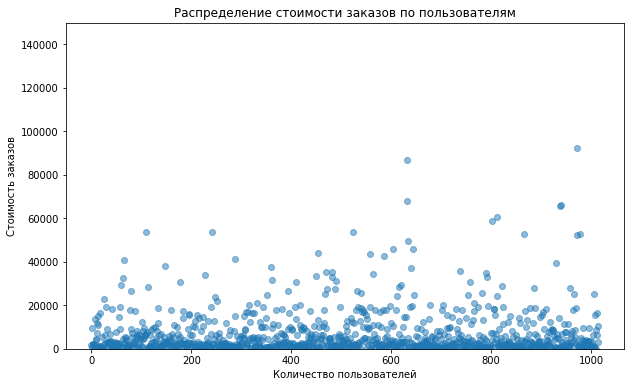

In [47]:
plt.figure(figsize=(10, 6))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

Основная масса заказов находится в районе до 20 тыс. руб.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Определим 95 и 99 перцентили стоимости заказов. 

In [48]:
np.percentile(orders['revenue'], [95, 99]) 

array([26785., 53904.])

Лишь 5 % превышают 27 тыс. руб. и только 1 % дороже 54 тыс. руб. 

Выберем границу для определения аномальных заказов - 53904. 

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Ранее в проекте мы:

 - Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
    
 - Увидели выбросы и нашли границу для их определения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым данным" — без удаления аномальных пользователей.

**Сформулируем гипотезы:** 

 - Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

 - Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

В нашем случае в данные распределены не нормально. Раннее мы уже обнаружили выбросы. Так как одно выбивающееся значение может повлиять на результат, в нашем случае для проверки гипотез мы буде использовать непараметрический тест Уилкоксона-Манна-Уитни.

Установим стандартный уровень статистической значимости = 0.05

Начнем с подготовки данных:

In [49]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               288850               507   
3                  68               385740               717   
4                  89               475648               756   

   visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
0               713                   719                   713  
1               581                  1338                  1294  
2               509                  1845                  1803  
3               770                  2562                  2573  
4               707                  3318                  3280

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами visitor_id и orders. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [50]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [51]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().

Округлим p-value до трёх знаков после запятой.
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [52]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост группы В к группе А: {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))
 

P-value: 0.011
Относительный прирост группы В к группе А: 15.980%


p-value значительно меньше 0.05, поэтому отвергаем нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов на посетителя есть статистически значимые различия. 
Относительный прирост группы В к группе А составляет почти 16 %. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым данным" — без удаления аномальных пользователей.

**Сформулируем гипотезы:** 

 - Нулевая: различий в среднем чеке заказа между группами нет. 

 - Альтернативная: различия в среднем чеке заказа между группами есть.

In [53]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост группы В к группе А: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.829
Относительный прирост группы В к группе А: 28.660%


p-value больше 0.05. Следовательно, статистически значимых отличий в среднем чеке между группами нет. Не получилось отвергнуть нулевую гипотезу. Относительное различие между средним чеком группы В от группы А почти 29 %.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя меду группами по "очищенным данным".

**Сформулируем гипотезы:** 

 - Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 

 - Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

Приступаем к подготовке очищенных от аномалий данных.

Напомним, что 95-й и 99-й перцентили стоимости заказов равны 26785 и 53904 рубля. А 95-й и 99-й перцентили числа заказов на одного посетителя равны 1 и 2 заказа на пользователя. 

Примите за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 53904 рубля. Так мы уберем 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Удалять нужно именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных. 

Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 


In [54]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], 
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head())
display(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64

16

Всего 16 аномальных пользователей. 

In [55]:
relative_loss = abnormalUsers.shape[0]/orders['visitor_id'].nunique()*100
print(relative_loss)

1.644398766700925


Относительные потери составляют 1,6 %. 

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [56]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Сформулируем гипотезы:** 

 - Нулевая: различий в среднем чеке заказа между группами нет. 

 - Альтернативная: различия в среднем чеке заказа на посетителя между группами есть.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным данным". 

In [57]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост группы В к группе А: {0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.007
Относительный прирост группы В к группе А: 18.921%


Результаты по среднему количеству заказов практически не изменились.  
p-value значительно меньше 0.05, поэтому отвергаем нулевую гипотезу. Анализ "очищенных данных" сообщает, что в среднем количестве заказов на посетителя есть статистически значимые различия. 
Относительный прирост группы В к группе А составляет почти 19%. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [58]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост группы В к группе А: {0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.788
Относительный прирост группы В к группе А: -3.234%


P-value увеличился. Такой же вывод как и по "сырым данным": различий в среднем чеке заказа между группами нет.Отвергнуть нулевую гипотезу мы не можем. 
Относительный прирост со знаком минус.


### Примите решение по результатам теста и объясните его. 

В процессе работы над проектом мы изучили общую информацию о крупном интернет-магазине. Вместе с отделом маркетинга был подготовлен список гипотез для увеличение выручки. Целью работы было приоритизировать гипотезы, запустить А/В-тест и проанализировать результаты. 

В первую очередь мы подключили нужные бибилиотеки и сохранили данные в датафрейм, просмотрели общую информацию.

Затем выполнили подготовку данных: заменили названия столбцов, привели их к нижнему регистру, преобразовали данные в нужные типы.

Выполнили приоритизацию 9 гипотез по увеличению выручки интернет-магазина: 

  - применили фреймворк ICE  для приоритизации гипотез, отсортировали по убыванию приоритета;
 
  - применили фреймворк RICE для приоритизации гипотез, отсортировали по убыванию приоритета;
  
  - указали, как изменилась приоритизация гипотез при приминении RICE вместо ICE, и почему это произошло. 
  
Далее мы провели анализ А/В-теста: 

  - Построили график кумулятивной выручки по группам. Выяснили, что кумулятивная выручка группы В имеет резкий скачок между 18-19 августа, что говорит о всплесках заказов, либо в этот момент оформляли очень доростоящие товары. Кумулятивная выручка группы А растет линейно.
  
  - Построили график кумулятивного среднего чека по группам. Выяснили: Средний чек в группе А к 13 числу стабилизировался и далее находился более менее на одном уровне. Снова мы видим резкий скачок группы В. После 17-18 числа он начинает снижаться.
  
  - Построили график относительного изменения кумулятивного среднего чека группы B к группе A. Выяснили: График имеет несколько резких скачков. Все графики пока имеют одну тенденцию. Где-то точно есть крупные заказы и выбросы!
  
  - Построили график кумулятивного среднего количества заказов на посетителя по группам. Выяснили: Вначале группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд.Среднее количество заказов на посетителя группы В выглядит значительно лучше, чем в группе А.
  
  - Построили график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выяснили: Кумулятивное среднее количество заказов на посетителя группы В была относительно ниже, чем в группе А. Но затем быстро пошла вверх. Также не будем забывать про наличие крупных заказов в группе В или выбросах.
  
  - Построили точечный график количества заказов по пользователям. Выяснили: большинство пользователей совершают не более 1-2 заказов.
  
  - Посчитали 95-й и 99-й перцентили количества заказов на пользователя. Определили границу для аномальных пользователей - не более 2 заказов. 
  
  - Постройте точечный график стоимостей заказов. Максимальная сумма заказа 1,3 млн руб. 
  
  - Посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для аномальных заказов - не более 53904 руб. 
  
  - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. p-value значительно меньше 0.05, поэтому отвергаем нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов на посетителя есть статистически значимые различия. Относительный прирост группы В к группе А составляет 15,9%. 
  
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. p-value больше 0.05. Следовательно, статистически значимых отличий в среднем чеке между группами нет. Не получилось отвергнуть нулевую гипотезу. Относительное различие между средним чеком группы В от группы А 28,6 %.
  
  - Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным: различий в среднем чеке заказа между группами нет.
  
  - Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным: различий в среднем чеке заказа между группами нет.
  
Так как есть статистическое различие по количеству заказов по "сырым" и очищенным от аномалий данным, можем сделать вывод, что конверсия группы В выше, чем у группы А. 
Также нет статистически значимого различия при сравнении среднего чека группы В и группы А. 
Судя по графикам и оьщему анализу результаты группы В значительно лучше. 

По результату теста нами принято решение остановить тест и зафиксировать победу группы В. 

